### Edgar Moises Hernandez-Gonzalez
#### 29/03/20-03/04/20
#### Clasificacion de CIFAR10 con Transfer Learning usando VGG16
##### class_names = ['avion', 'auto', 'pajaro', 'gato', 'venado', 'perro', 'rana', 'caballo', 'barco', 'camion']
##### Accuracy = 61.66%

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report

In [0]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


In [4]:
n_samples_train = len(y_train)
n_samples_test = len(y_test) #en caso de no tener el y_test se puede utilizar el x_test

print("n_samples_train:", n_samples_train)
print("n_samples_test :", n_samples_test)

n_samples_train: 50000
n_samples_test : 10000


In [5]:
n_classes = len(np.unique(y_test)) #esto se podria calcular asi n_clases = len(np.unique(y)), la y puede ser train o test
print("n_classes:", n_classes)

n_classes: 10


In [0]:
#convertir a float
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#escalar los valores en un rango de 0 a 1 (normalizar)
x_train /= 255.0
x_test /= 255.0

In [0]:
base_model = VGG16(weights='imagenet',
                   include_top=False,
                   input_shape=x_train.shape[1:])

In [8]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0     

In [9]:
#Extraccion de caracteristicas con VGG16
x_train = base_model.predict(x_train)
print(x_train.shape)

x_test = base_model.predict(x_test)
print(x_test.shape)

(50000, 1, 1, 512)
(10000, 1, 1, 512)


In [0]:
model = Sequential()
model.add(Flatten(input_shape=x_train.shape[1:]))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(n_classes, activation='softmax'))

optimizer = Adam(lr=1e-4)
model.compile(optimizer = optimizer,
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [20]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                32832     
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                650       
Total params: 33,482
Trainable params: 33,482
Non-trainable params: 0
_________________________________________________________________


In [21]:
history = model.fit(x_train, y_train, epochs=200, batch_size=128,
                    validation_data=(x_test, y_test), verbose=2)

Epoch 1/200
391/391 - 1s - loss: 2.0917 - accuracy: 0.2526 - val_loss: 1.8442 - val_accuracy: 0.3847
Epoch 2/200
391/391 - 1s - loss: 1.7660 - accuracy: 0.3888 - val_loss: 1.6338 - val_accuracy: 0.4461
Epoch 3/200
391/391 - 1s - loss: 1.6293 - accuracy: 0.4338 - val_loss: 1.5376 - val_accuracy: 0.4795
Epoch 4/200
391/391 - 1s - loss: 1.5509 - accuracy: 0.4619 - val_loss: 1.4757 - val_accuracy: 0.4986
Epoch 5/200
391/391 - 1s - loss: 1.4978 - accuracy: 0.4821 - val_loss: 1.4326 - val_accuracy: 0.5087
Epoch 6/200
391/391 - 1s - loss: 1.4529 - accuracy: 0.4957 - val_loss: 1.3993 - val_accuracy: 0.5206
Epoch 7/200
391/391 - 1s - loss: 1.4239 - accuracy: 0.5057 - val_loss: 1.3738 - val_accuracy: 0.5281
Epoch 8/200
391/391 - 1s - loss: 1.3974 - accuracy: 0.5147 - val_loss: 1.3537 - val_accuracy: 0.5339
Epoch 9/200
391/391 - 1s - loss: 1.3763 - accuracy: 0.5227 - val_loss: 1.3366 - val_accuracy: 0.5372
Epoch 10/200
391/391 - 1s - loss: 1.3555 - accuracy: 0.5312 - val_loss: 1.3230 - val_accura

In [22]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

313/313 - 1s - loss: 1.1111 - accuracy: 0.6166
Test loss: 1.111110806465149
Test accuracy: 0.616599977016449


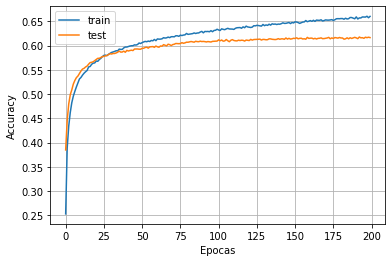

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.grid()
plt.xlabel('Epocas')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'])
plt.show()

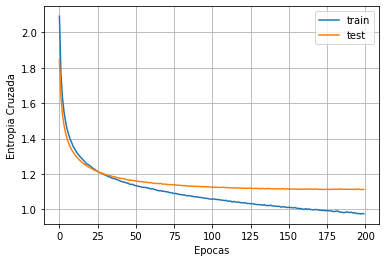

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.xlabel('Epocas')
plt.ylabel('Entropia Cruzada')
plt.legend(['train', 'test'])
plt.show()

In [0]:
probabilidades = model.predict(x_test)
y_pred = np.argmax(probabilidades, 1) #1=fila

In [26]:
matrizConfusion = confusion_matrix(y_test, y_pred)
print(matrizConfusion)

[[726  27  47  16  13  10  14  20  87  40]
 [ 32 680  14  29   9  18  28  21  40 129]
 [ 75  20 498  71  98  63  96  49  13  17]
 [ 23  38  70 412  46 170 111  41  24  65]
 [ 28  12  89  57 521  39 109  88  30  27]
 [ 12  21  54 175  51 547  42  64   6  28]
 [ 10  25  53  70  58  45 704   8  12  15]
 [ 28  15  38  36  63  65  14 688   9  44]
 [ 77  59  20  13   8   6  11   9 737  60]
 [ 42 127  10  32  10  21  15  42  48 653]]


In [27]:
reporteClassificacion = classification_report(y_test, y_pred)
print(reporteClassificacion)

              precision    recall  f1-score   support

           0       0.69      0.73      0.71      1000
           1       0.66      0.68      0.67      1000
           2       0.56      0.50      0.53      1000
           3       0.45      0.41      0.43      1000
           4       0.59      0.52      0.56      1000
           5       0.56      0.55      0.55      1000
           6       0.62      0.70      0.66      1000
           7       0.67      0.69      0.68      1000
           8       0.73      0.74      0.73      1000
           9       0.61      0.65      0.63      1000

    accuracy                           0.62     10000
   macro avg       0.61      0.62      0.61     10000
weighted avg       0.61      0.62      0.61     10000

